In [1]:
!pip install hdbscan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.mixture import GaussianMixture

# Cargar datos
data = pd.read_excel('MetaData.xlsx')
df = pd.DataFrame(data)

# Eliminar columnas irrelevantes
df = df.drop(df.columns[[0, -1, 10, 11]], axis=1)

# Eliminar filas con NaN en 'Survival Time (years)'
df = df.dropna(subset=['Survival Time (years)'], axis=0)

# Identificar variables numéricas y categóricas
numeric_vars = ['Age at Diagnosis', 'Survival Time (years)']
categorical_vars = ['Sex', 'Race', 'Definition', 'Menopausal Status', 'Cancer Type',
                    'ER', 'PR', 'HER2', 'Survival Status', 'Subtype', 'Genetic Ancestry']

# Convertir variables categóricas a números antes de escalar
for col in categorical_vars:
    df[col] = LabelEncoder().fit_transform(df[col])

# Normalizar datos numéricos
scaler = MinMaxScaler()
df[numeric_vars] = scaler.fit_transform(df[numeric_vars])

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df)

# Aplicar GMM
gmm = GaussianMixture(n_components=3, random_state=42)  # Cambiar 'n_components' al número de clusters que consideres adecuado
df['Cluster'] = gmm.fit_predict(df)

# Visualización en 3D con Plotly
fig = px.scatter_3d(df,
                    x=pca_result[:, 0],
                    y=pca_result[:, 1],
                    z=pca_result[:, 2],
                    color=df['Cluster'].astype(str),
                    title="Clustering con GMM y PCA en 3D",
                    labels={'x': 'Componente Principal 1', 'y': 'Componente Principal 2', 'z': 'Componente Principal 3'})

fig.show()


In [2]:
# Ver los tamaños de los clusters
cluster_sizes = df['Cluster'].value_counts()
print("Tamaños de los clusters:")
print(cluster_sizes)

# Descripción estadística de los grupos por cluster
for cluster in df['Cluster'].unique():
    print(f"\nDescripción del grupo {cluster}:")
    print(df[df['Cluster'] == cluster].describe())


Tamaños de los clusters:
Cluster
0    830
2    242
1     80
Name: count, dtype: int64

Descripción del grupo 2:
       Age at Diagnosis    Sex        Race  Definition  Menopausal Status  \
count        242.000000  242.0  242.000000  242.000000         242.000000   
mean           0.547422    0.0    1.900826    0.066116           5.020661   
std            0.189006    0.0    0.545140    0.248999           0.922060   
min            0.190476    0.0    0.000000    0.000000           2.000000   
25%            0.396825    0.0    2.000000    0.000000           5.000000   
50%            0.555556    0.0    2.000000    0.000000           5.000000   
75%            0.682540    0.0    2.000000    0.000000           5.000000   
max            0.984127    0.0    3.000000    1.000000           7.000000   

       Cancer Type          ER          PR        HER2  Survival Status  \
count   242.000000  242.000000  242.000000  242.000000       242.000000   
mean      6.590909    2.838843    2.652893  

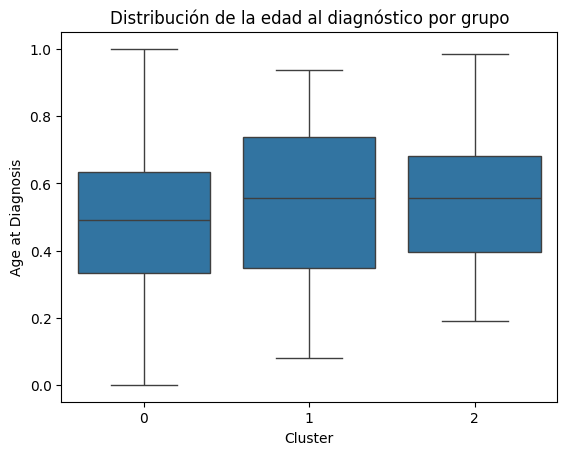

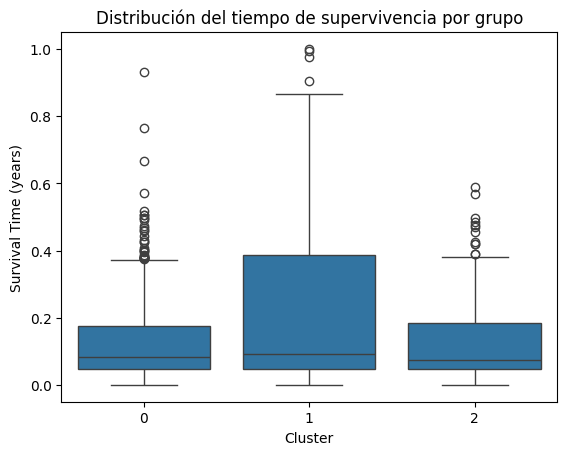

In [3]:
# Comparar las variables numéricas por cluster
import seaborn as sns

# Graficar distribución de 'Age at Diagnosis' por cluster
sns.boxplot(x='Cluster', y='Age at Diagnosis', data=df)
plt.title('Distribución de la edad al diagnóstico por grupo')
plt.show()

# Graficar distribución de 'Survival Time (years)' por cluster
sns.boxplot(x='Cluster', y='Survival Time (years)', data=df)
plt.title('Distribución del tiempo de supervivencia por grupo')
plt.show()


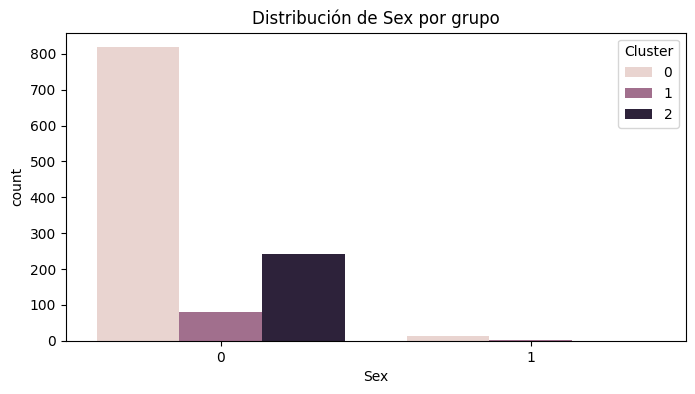

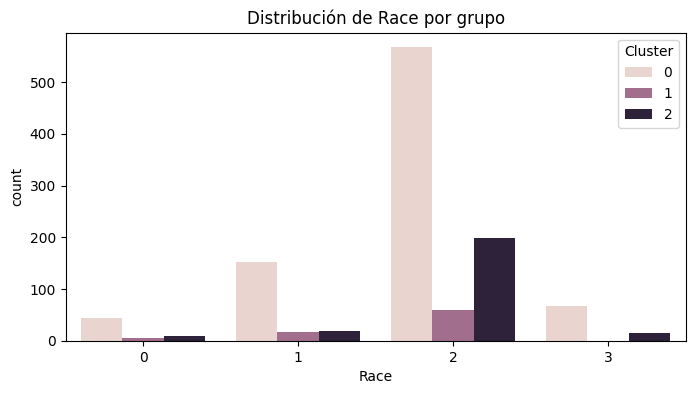

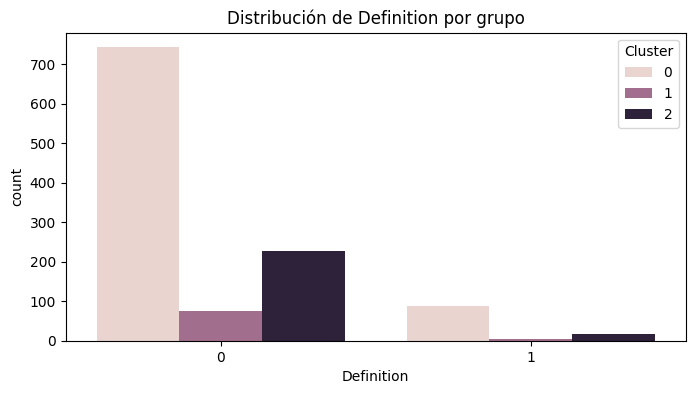

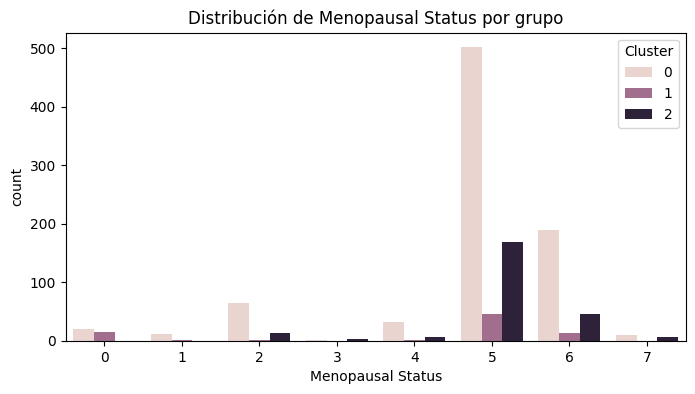

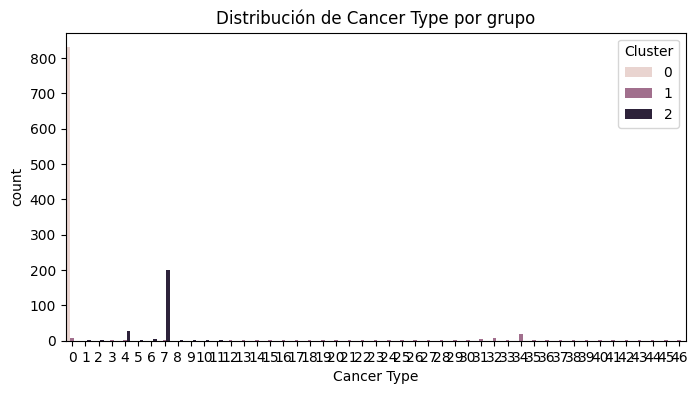

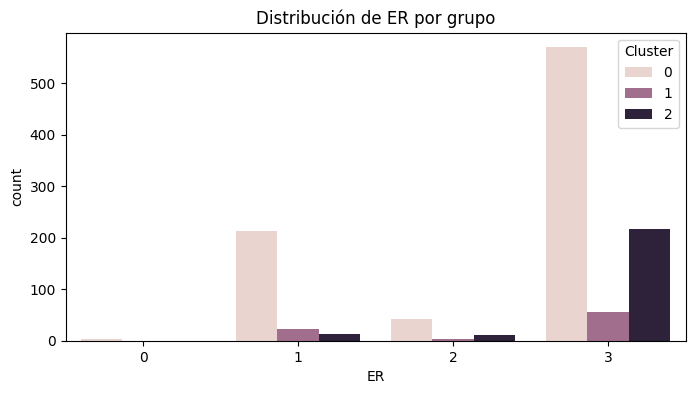

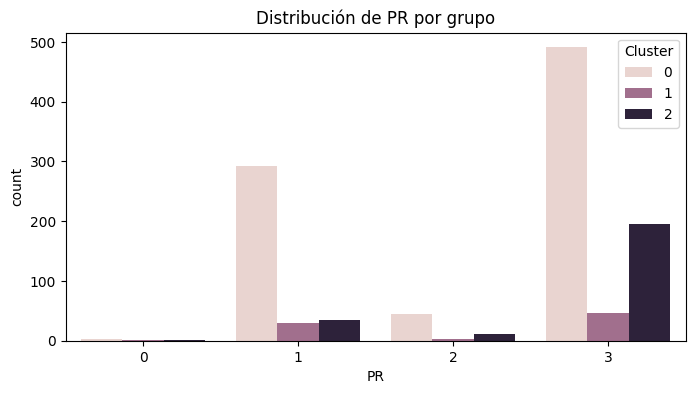

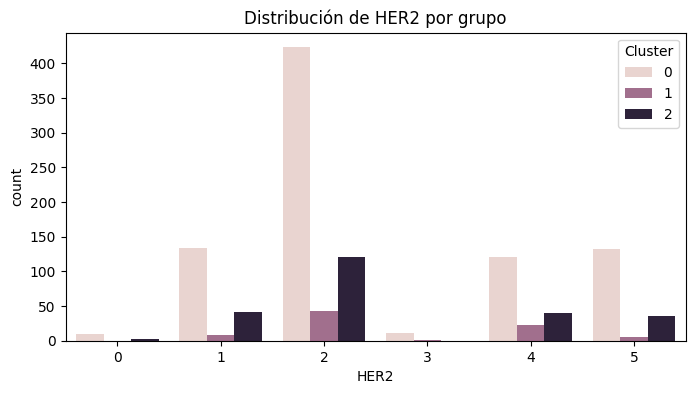

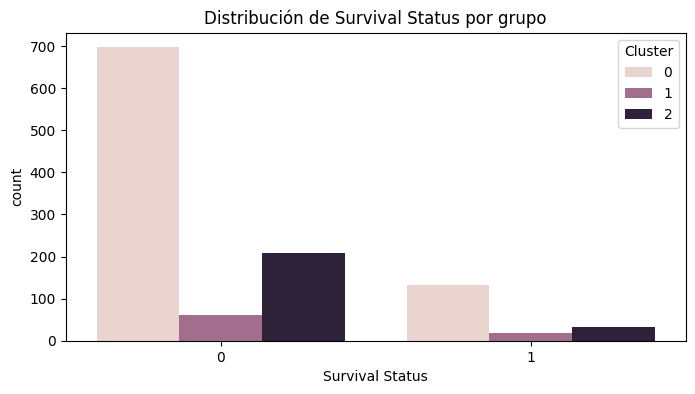

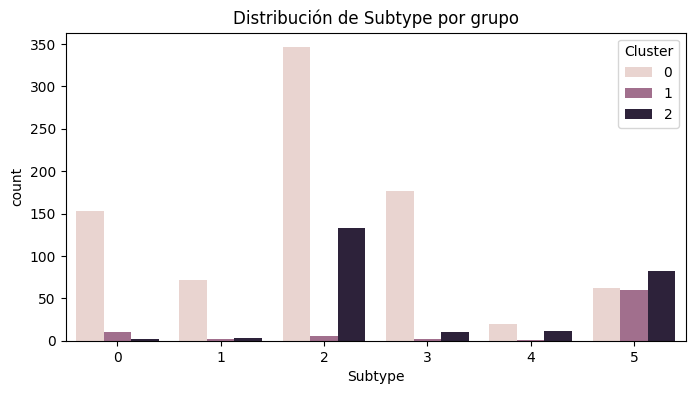

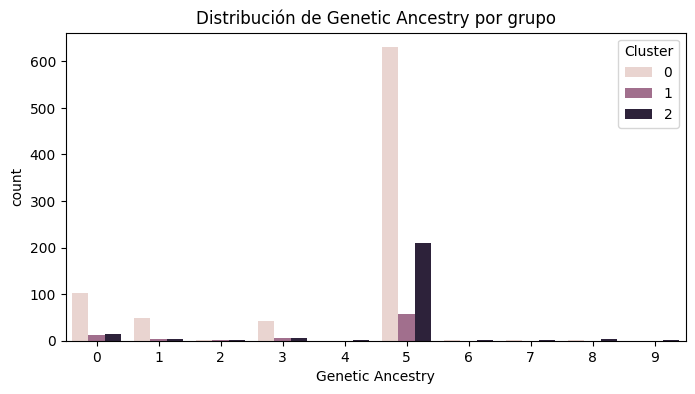

In [4]:
# Analizar distribución de variables categóricas por cluster
for col in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Cluster', data=df)
    plt.title(f'Distribución de {col} por grupo')
    plt.show()


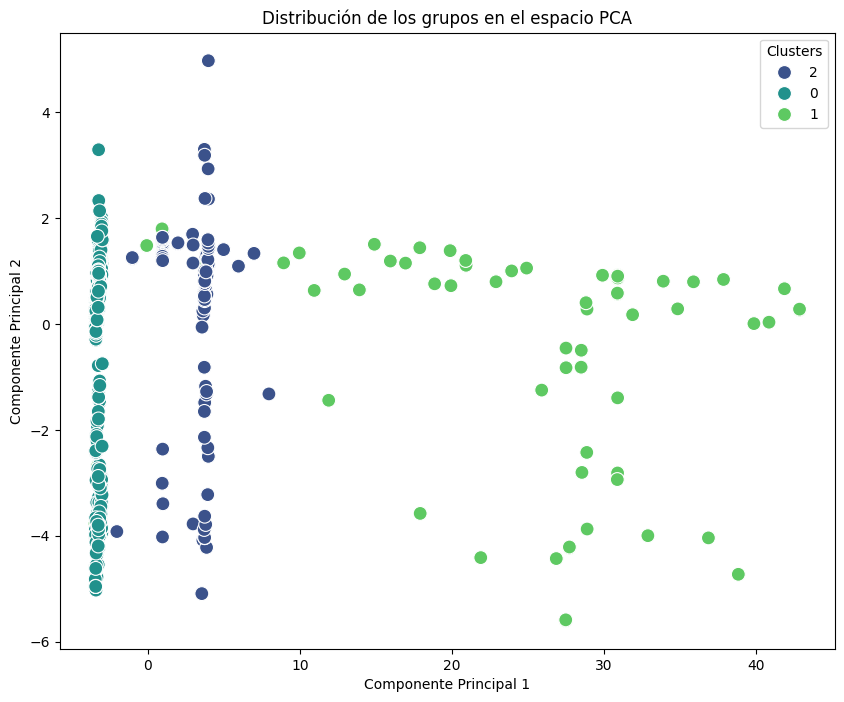

In [5]:
# Visualizar los grupos en el espacio de PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Cluster'].astype(str), palette='viridis', s=100)
plt.title("Distribución de los grupos en el espacio PCA")
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title="Clusters")
plt.show()
